## CONVOLUTIONAL NEURAL NETWORKS

In this assignment, we'll first learn about the individual components of a CNN, and then build one!

### BUILDING A BASIC MODEL
Perhaps the most basic CNN application is handwritten digit recognition. We will develop a model for the same.

In [ ]:
import tensorflow as tf
import sklearn as sk
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
(X_train,y_train),(X_test,y_test)=mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


**What is the no. of elements in the training and testing datasets?**

In [ ]:
print(f"Training dataset: {len(X_train)}")
print(f"Testing dataset: {len(X_test)}")

Training dataset: 60000
Testing dataset: 10000


**What are the labels in the dataset?**

In [ ]:
print(f"Labels: {set(y_train)}")

Labels: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


**Visualise one image for each label.**

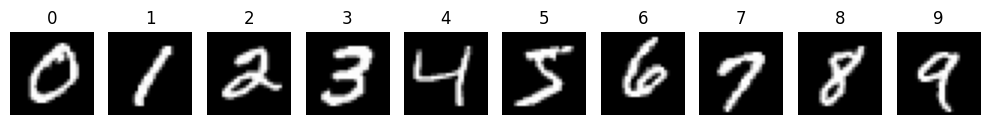

In [ ]:
import numpy as np

# Create a figure with 1 row and 10 columns
plt.figure(figsize=(10, 5))

# Loop through labels 0 to 9
for label in range(10):
    # Find the first index of the current label in y_train
    index = np.where(y_train == label)[0][0]

    # Plot the corresponding image
    plt.subplot(1, 10, label + 1)
    plt.imshow(X_train[index], cmap='gray')
    plt.title(f"{label}")
    plt.axis('off')

# Show the plot
plt.tight_layout()
plt.show()

**One-hot encode the y labels.**

In [ ]:
from tensorflow.keras.utils import to_categorical

# One-hot encode the labels
y_train_encoded = to_categorical(y_train, num_classes=10)
y_test_encoded = to_categorical(y_test, num_classes=10)

# Check the shape and a sample
print("Shape of y_train_encoded:", y_train_encoded.shape)
print("Example of one-hot encoded label for digit 5:")
print(y_train_encoded[5])


Shape of y_train_encoded: (60000, 10)
Example of one-hot encoded label for digit 5:
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


**Let's see what every image looks like! Print the pixel array of any one image, and then display the image as well.**

Pixel values for the selected image:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0  

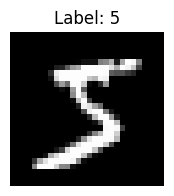

In [ ]:
# Choose an index
index = 0

# Print the pixel array of the selected image
print("Pixel values for the selected image:")
print(X_train[index])

# Display the image
plt.figure(figsize=(2, 2))
plt.imshow(X_train[index], cmap='gray')
plt.title(f"Label: {y_train[index]}")
plt.axis('off')
plt.show()


**Change the dimension of the training and testing datasets for it to become a 3D one.**
Hint: Currently the training dataset is of shape (60000, 28, 28) and you need to reshape it to (60000, 28, 28, 1). Do the same for the testing dataset.

Pixel values for the selected test image:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  84 185 159 151  60  36   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 

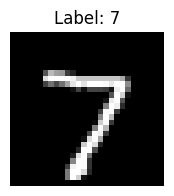

In [ ]:
# Choose an index for the testing dataset
index = 0

# Print the pixel array of the selected image
print("Pixel values for the selected test image:")
print(X_test[index])

# Display the image
plt.figure(figsize=(2, 2))
plt.imshow(X_test[index], cmap='gray')
plt.title(f"Label: {y_test[index]}")
plt.axis('off')
plt.show()



**The last step in the preparation of the dataset is normalisation of the pixel values.**

In [ ]:
# Normalize the pixel values
X_train_normalized = X_train_reshaped / 255.0
X_test_normalized = X_test_reshaped / 255.0

# Check the range of values
print("Min and max values in normalized X_train:", X_train_normalized.min(), X_train_normalized.max())
print("Min and max values in normalized X_test:", X_test_normalized.min(), X_test_normalized.max())


Min and max values in normalized X_train: 0.0 1.0
Min and max values in normalized X_test: 0.0 1.0


**Now we begin training. Compile a model that has 1 convolutional layer with 32 filters, followed by a max pooling layer, followed by another convolutional layer with 64 filters, followed by a max pooling layer and finally dense layers.** - (these are the optimal values of parameters for achieving maximum accuracy)

In [ ]:
model = tf.keras.models.Sequential()

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Initialize the CNN model
model = Sequential()

# First convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output
model.add(Flatten())

# Fully connected layer
model.add(Dense(128, activation='relu'))

# Output layer for classification
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

**Compile the model with Adam optimizer, and a suitable loss function. Use accuracy as the metric for training.**

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


**Fit the model and plot the training history.**

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 43s 56ms/step - accuracy: 0.8736 - loss: 0.4228 - val_accuracy: 0.9827 - val_loss: 0.0605
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 80s 54ms/step - accuracy: 0.9829 - loss: 0.0549 - val_accuracy: 0.9869 - val_loss: 0.0453
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 40s 53ms/step - accuracy: 0.9896 - loss: 0.0325 - val_accuracy: 0.9882 - val_loss: 0.0435
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 40s 52ms/step - accuracy: 0.9915 - loss: 0.0251 - val_accuracy: 0.9879 - val_loss: 0.0398
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 42s 53ms/step - accuracy: 0.9938 - loss: 0.0180 - val_accuracy: 0.9871 - val_loss: 0.0443
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 40s 52ms/step - accuracy: 0.9954 - loss: 0.0142 - val_accuracy: 0.9893 - val_loss: 0.0409
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 39s 52ms/step - accuracy: 0.9958 - loss: 0.0120 - val_accuracy: 0.9891 - val_loss: 0.0424
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 51ms/step - accuracy: 0.9968 - loss: 0.0095 - 

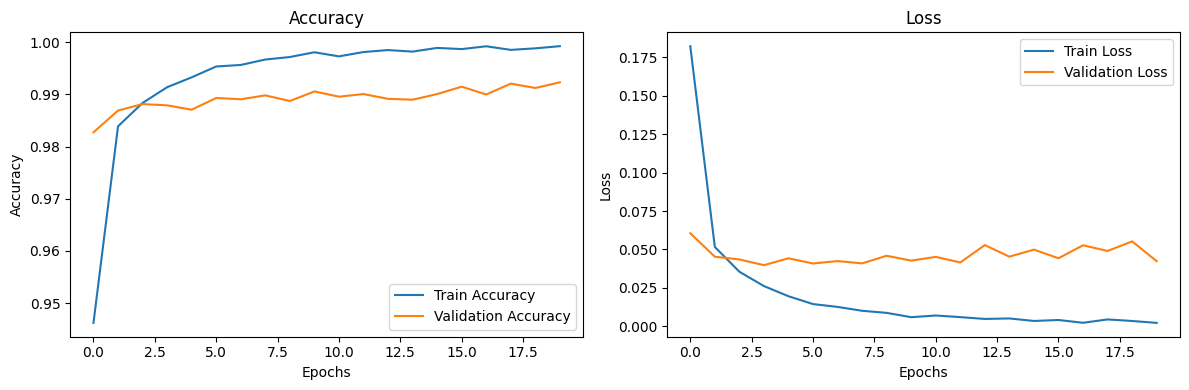

In [ ]:
# Fit the model
history = model.fit(X_train_normalized, y_train_encoded,
                    epochs=20, batch_size=64,
                    validation_split=0.2)

# Plot the training history
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


**Now test your model on the training dataset and print the classification matrix.**

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, model.predict(X_test).argmax(axis=1)))

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       1.00      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.98      1.00      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



**Lets visualise the prediction, along with the input now.**

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


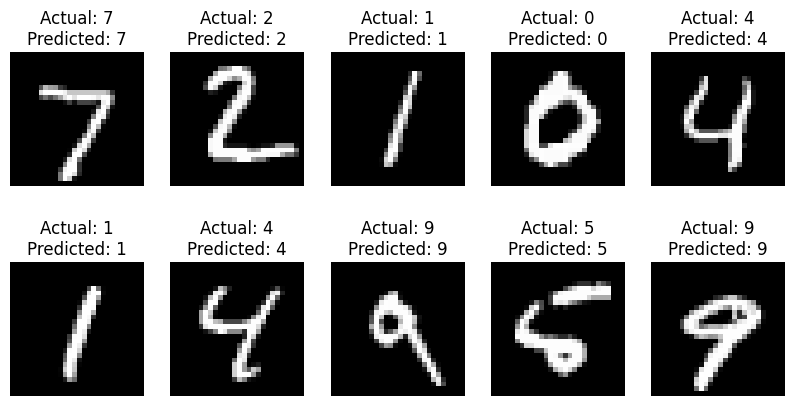

In [ ]:
rows = 2
columns = 5

y_pred = model.predict(X_test).argmax(axis=1)

figure = plt.figure(figsize=(10, 5))

for i in range(10):

    figure.add_subplot(rows, columns, i+1)

    plt.imshow(X_test[i], cmap='grey')
    plt.title(f"Actual: {y_test[i]}\nPredicted: {y_pred[i]}")
    plt.axis('off')

**But what did the convolution layers do? Lets visualise the outputs of filters for the first test image.**

In [ ]:
layer_outputs = [layer.output for layer in model.layers if 'conv' in layer.name or 'pool' in layer.name]
activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)

test_image = X_test[0].reshape(1, 28, 28, 1)

feature_maps = activation_model.predict(test_image)

plt.figure(figsize=(5, 5))
plt.imshow(test_image[0, :, :, 0], cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.show()

n_filters = feature_maps[0].shape[-1]
fig, axes = plt.subplots(4, 8, figsize=(15, 8))

for i in range(n_filters):
    ax = axes[i // 8, i % 8]
    ax.imshow(feature_maps[0][0, :, :, i], cmap='grey')
    ax.axis('off')

plt.show()


**Output of the max pooling layer.**

In [ ]:
n_filters = feature_maps[1].shape[-1]
fig, axes = plt.subplots(4, 8, figsize=(15, 8))

for i in range(n_filters):
    ax = axes[i // 8, i % 8]
    ax.imshow(feature_maps[1][0, :, :, i], cmap='grey')
    ax.axis('off')

plt.show()